### 데이터 로드 및 전처리

- `keras.datasets`에서 boston_housing 로드

In [1]:
# 사용할 라이브러리 불러오기
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드해오기
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인
print(len(train_data))
print(len(test_data))

404
102


- 데이터셋의 전처리를 위해 표준화 작업 수행

In [3]:
# 먼저 입력 데이터의 각 특성의 평균을 뺀다
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눈다
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만든다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 위와 같이 작업해준다.
test_data = test_data - mean
test_data = test_data / std

### 모델 구성 및 컴파일

- 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일
- Sequential() 함수를 사용함

In [4]:
# input_shape은 (train_data.shape[1], )으로 구성한다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용한다.

from tensorflow.keras.optimizers import Adam

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error',
              optimizer = optimizer,
              metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 42,497
Trainable params: 42,497
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [5]:
history = model.fit(train_data, train_labels,
                    epochs=200,
                    batch_size=256,
                    validation_split=0.3,
                    )

Epoch 1/200
2/2 [==============================] - 1s 147ms/step - loss: 553.6750 - mae: 21.9015 - val_loss: 625.4977 - val_mae: 22.8672
Epoch 2/200
2/2 [==============================] - 0s 19ms/step - loss: 533.7960 - mae: 21.4143 - val_loss: 603.9196 - val_mae: 22.3671
Epoch 3/200
2/2 [==============================] - 0s 18ms/step - loss: 513.2972 - mae: 20.9045 - val_loss: 580.4357 - val_mae: 21.8077
Epoch 4/200
2/2 [==============================] - 0s 19ms/step - loss: 491.1870 - mae: 20.3312 - val_loss: 553.7720 - val_mae: 21.1532
Epoch 5/200
2/2 [==============================] - 0s 18ms/step - loss: 466.0226 - mae: 19.6601 - val_loss: 523.0161 - val_mae: 20.3853
Epoch 6/200
2/2 [==============================] - 0s 18ms/step - loss: 437.1071 - mae: 18.8707 - val_loss: 487.7826 - val_mae: 19.4765
Epoch 7/200
2/2 [==============================] - 0s 17ms/step - loss: 404.4729 - mae: 17.9434 - val_loss: 447.8637 - val_mae: 18.4218
Epoch 8/200
2/2 [==============================

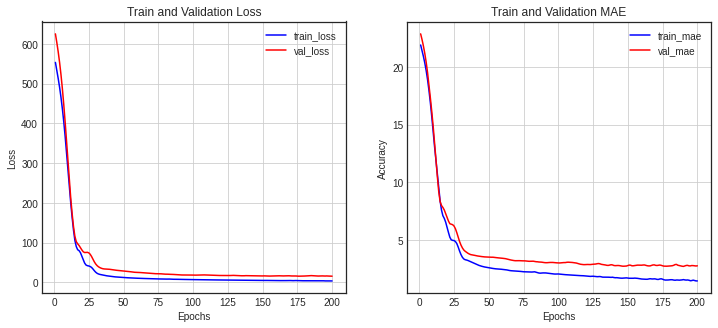

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여준다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

- 테스트 데이터를 가져와 모델 성능을 평가해본다.

In [7]:
test_loss, test_mae = model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 21.3071 - mae: 2.8138
